In [79]:
import sys
import importlib
from itertools import product
from pathlib import Path

import jsonlines  # type: ignore
import numpy as np  # type: ignore
import matplotlib  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
from tqdm import tqdm  # type: ignore

sys.path.append('../../src/')

from utils import SchedulerOption  # type: ignore # noqa: E402
from utils import MemoSchemeOption  # type: ignore # noqa: E402
from utils import ConstructionOption  # type: ignore # noqa: E402
from utils import MatchingType  # type: ignore # noqa: E402

In [2]:
matching_types = [e.value for e in MatchingType]
constructions = [e.value for e in ConstructionOption]
scheduler_memo_schemes = [
    (SchedulerOption.SPENCER.value, MemoSchemeOption.NONE.value),
    (SchedulerOption.SPENCER.value, MemoSchemeOption.CLOSURE_NODE.value),
    (SchedulerOption.SPENCER.value, MemoSchemeOption.IN_DEGREE.value),
    (SchedulerOption.LOCKSTEP.value, MemoSchemeOption.NONE.value)
]
input_types = ['positive', 'negative']

In [3]:
DatasetDict = dict[str, dict[str, dict[str, dict[str, list[dict]]]]]
datasets: DatasetDict = {}
data_dir = Path('../../data/')
it = product(matching_types, constructions, scheduler_memo_schemes)
for matching_type, construction, (scheduler, memo_sheme) in it:
    filename = (
        f'all-{matching_type}-{construction}-{scheduler}-{memo_sheme}.jsonl')
    filepath = data_dir / 'benchmark_results' / filename
    print("Loading", filepath)
    dataset = [e for e in tqdm(jsonlines.open(filepath))]
    (
        datasets
        .setdefault(matching_type, {})
        .setdefault(construction, {})
        .setdefault(scheduler, {})
        .setdefault(memo_sheme, dataset)
    )

Loading ../../data/benchmark_results/all-full-thompson-spencer-none.jsonl


440101it [00:29, 15167.19it/s]


Loading ../../data/benchmark_results/all-full-thompson-spencer-cn.jsonl


440101it [00:29, 14972.46it/s]


Loading ../../data/benchmark_results/all-full-thompson-spencer-in.jsonl


440101it [00:29, 14684.33it/s]


Loading ../../data/benchmark_results/all-full-thompson-lockstep-none.jsonl


440101it [00:26, 16560.07it/s]


Loading ../../data/benchmark_results/all-full-flat-spencer-none.jsonl


440101it [00:29, 15001.34it/s]


Loading ../../data/benchmark_results/all-full-flat-spencer-cn.jsonl


440101it [00:32, 13361.87it/s]


Loading ../../data/benchmark_results/all-full-flat-spencer-in.jsonl


440101it [00:34, 12683.34it/s]


Loading ../../data/benchmark_results/all-full-flat-lockstep-none.jsonl


440101it [00:20, 21089.29it/s]


Loading ../../data/benchmark_results/all-partial-thompson-spencer-none.jsonl


440101it [00:36, 12198.05it/s]


Loading ../../data/benchmark_results/all-partial-thompson-spencer-cn.jsonl


440101it [00:20, 21746.36it/s]


Loading ../../data/benchmark_results/all-partial-thompson-spencer-in.jsonl


440101it [00:42, 10351.30it/s]


Loading ../../data/benchmark_results/all-partial-thompson-lockstep-none.jsonl


440101it [00:20, 21422.55it/s]


Loading ../../data/benchmark_results/all-partial-flat-spencer-none.jsonl


440101it [00:20, 21672.95it/s]


Loading ../../data/benchmark_results/all-partial-flat-spencer-cn.jsonl


440101it [00:47, 9235.73it/s] 


Loading ../../data/benchmark_results/all-partial-flat-spencer-in.jsonl


440101it [00:20, 21286.97it/s]


Loading ../../data/benchmark_results/all-partial-flat-lockstep-none.jsonl


440101it [00:18, 23726.64it/s]


In [4]:
# Eliminated
_eliminated = []
with jsonlines.open(data_dir / 'statistics' / 'all-flat-none.jsonl') as reader:
    for data in reader:
        statistics = data['statistics']
        if statistics is None:
            _eliminated.append(0)
            continue
        _eliminated.append(statistics['eliminated'])
eliminated = np.array(_eliminated)

In [5]:
eliminated_mask = eliminated > 0

In [65]:
dataset = datasets['full']['flat']['spencer']['none']
patterns = [e['pattern'] for e in dataset]
print(dataset[0])

{'pattern': '', 'positive_inputs': ['', '', '', '', '', '', '', '', '', ''], 'negative_inputs': ['Z', '+', 'U', 'P', 's', 'O', 'c', 'P', 'Q', 'v'], 'input_lengths': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'positive_benchmark_results': [{'step': 0, 'memo_entry': 0, 'state': 0, 'eliminated': 0, 'memoised': 0, 'thread': 1}, {'step': 0, 'memo_entry': 0, 'state': 0, 'eliminated': 0, 'memoised': 0, 'thread': 1}, {'step': 0, 'memo_entry': 0, 'state': 0, 'eliminated': 0, 'memoised': 0, 'thread': 1}, {'step': 0, 'memo_entry': 0, 'state': 0, 'eliminated': 0, 'memoised': 0, 'thread': 1}, {'step': 0, 'memo_entry': 0, 'state': 0, 'eliminated': 0, 'memoised': 0, 'thread': 1}, {'step': 0, 'memo_entry': 0, 'state': 0, 'eliminated': 0, 'memoised': 0, 'thread': 1}, {'step': 0, 'memo_entry': 0, 'state': 0, 'eliminated': 0, 'memoised': 0, 'thread': 1}, {'step': 0, 'memo_entry': 0, 'state': 0, 'eliminated': 0, 'memoised': 0, 'thread': 1}, {'step': 0, 'memo_entry': 0, 'state': 0, 'eliminated': 0, 'memoised': 0, 'th

In [7]:
counter_targets_path = (
    '../../repeated_nullability/counters/all_regexes/PARSE_SUCCESS.jsonl')
counter_targets = [e["pattern"] for e in jsonlines.open(counter_targets_path)]

In [8]:
star_targets_path = (
    '../../repeated_nullability/stars/all_regexes/PARSE_SUCCESS.jsonl')
star_targets = [e["pattern"] for e in jsonlines.open(star_targets_path)]

In [9]:
targets = {'star': star_targets, 'counter': counter_targets}

In [19]:
def get_mask(patterns: list[str], targets: list[str]) -> np.array:
    indices = np.zeros(len(patterns), dtype=bool)
    D = {k: v for v, k in enumerate(patterns)}
    filtered = set(patterns) & set(targets)
    for k in filtered:
        indices[D[k]] = True
    return indices

In [20]:
star_mask = get_mask(patterns, targets['star'])

In [21]:
counter_mask = get_mask(patterns, targets['counter'])

In [28]:
dataset = datasets['full']['flat']['spencer']['none']
_result_mask = []
for data in dataset:
    positive_results = data['positive_benchmark_results']
    negative_results = data['negative_benchmark_results']
    invalid = positive_results is None and negative_results is None
    _result_mask.append(not invalid)
result_mask = np.array(_result_mask)

In [64]:
def get_average_values_from_dataset(dataset: list[dict], key: str) -> np.array:
    average_values = []
    for data in tqdm(dataset):
        positive_results = data['positive_benchmark_results']
        negative_results = data['negative_benchmark_results']
        values: list[int] = []
        for results in [positive_results, negative_results]:
            if results is not None:
                values += [
                    result[key]
                    for result in results
                    if result is not None
                ]
        average_value = np.mean(values) if len(values) > 0 else 0
        average_values.append(average_value)
    return np.array(average_values)

In [68]:
def get_average_input_lengths_from_dataset(dataset: list[dict]) -> np.array:
    average_lengths = []
    for data in tqdm(dataset):
        positive_inputs = data['positive_inputs']
        negative_inputs = data['negative_inputs']
        positive_results = data['positive_benchmark_results']
        negative_results = data['negative_benchmark_results']
        lengths: list[int] = []
        for inputs, results in [
            (positive_inputs, positive_results),
            (negative_inputs, negative_results)
        ]:
            if results is not None:
                lengths += [
                    len(string)
                    for string, result
                    in zip(inputs, results)
                    if result is not None
                ]
        average_length = np.mean(lengths) if len(lengths) > 0 else -1
        average_lengths.append(average_length)
    return np.array(average_lengths)

In [88]:
# Steps
steps_dict: dict = {}
for matching_type, construction, (scheduler, memo_sheme) in product(
    matching_types, constructions, scheduler_memo_schemes
):
    dataset = datasets[matching_type][construction][scheduler][memo_sheme]
    average_steps = get_average_values_from_dataset(dataset, 'step')
    (
        steps_dict
        .setdefault(matching_type, {})
        .setdefault(construction, {})
        .setdefault(scheduler, {})
        .setdefault(memo_sheme, average_steps)
    )

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 440101/440101 [00:06<00:00, 69824.66it/s]


In [89]:
# States
states_dict: dict = {}
for matching_type, construction, (scheduler, memo_sheme) in product(
    matching_types, constructions, scheduler_memo_schemes
):
    dataset = datasets[matching_type][construction][scheduler][memo_sheme]
    average_states = get_average_values_from_dataset(dataset, 'state')
    (
        states_dict
        .setdefault(matching_type, {})
        .setdefault(construction, {})
        .setdefault(scheduler, {})
        .setdefault(memo_sheme, average_states)
    )

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 440101/440101 [00:05<00:00, 78427.28it/s]


In [69]:
dataset = datasets['full']['flat']['spencer']['none']
input_length = get_average_input_lengths_from_dataset(dataset)
pattern_length = get_average_input_lengths_from_dataset(dataset)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 440101/440101 [00:05<00:00, 79650.97it/s]


In [91]:
prefix_to_data = {
    'step': steps_dict,
    'state': states_dict,
}

In [104]:
def draw_plot(dry_run: bool) -> None:
    if dry_run:
        plt.show()
        return

    rcParams = matplotlib.rcParams
    matplotlib.use("pgf")
    matplotlib.rcParams.update({
        "font.family": "serif",
        "font.size": 11,
        "pgf.rcfonts": False,
        "pgf.texsystem": "pdflatex",
        "text.usetex": True,
    })
    plt.close()

    plt.savefig(filepath.with_suffix('.pdf'), bbox_inches='tight')
    plt.savefig(filepath.with_suffix('.pgf'), bbox_inches='tight')
    matplotlib.rcParams.update(rcParams)

In [202]:
%matplotlib inline
dry_run = True

In [200]:
dry_run = False

In [ ]:
xs = pattern_length
ys = input_length

max_x = np.mean(xs) + np.std(xs)
min_x = max(np.mean(xs) - np.std(xs), 0)

max_y = np.mean(ys) + np.std(ys)
min_y = max(np.mean(ys) - np.std(ys), 0)

xlim = (min(min_x, min_y), max(max_x, max_y))

xspace = np.linspace(xlim[0], xlim[1], 50)
yspace = np.linspace(xlim[0], xlim[1], 50)

bins = (xspace, yspace)
print(np.sum(xs > xlim[1]))
print(np.sum(ys > xlim[1]))

plt.hist(xs, xspace, histtype='stepfilled', alpha=0.5)
plt.hist(ys, yspace, histtype='stepfilled', alpha=0.5)

plt.legend(['Pattern', 'Input'])
plt.xlabel('Length')
plt.xscale('symlog')
plt.show()
filepath = Path('./outputs') / 'input' / 'hist'
if dry_run:
    plt.show()
else:
    filepath.parent.mkdir(parents=True, exist_ok=True)
    print(filepath)
    plt.savefig(filepath.with_suffix('.pdf'), bbox_inches='tight')
    plt.savefig(filepath.with_suffix('.pgf'), bbox_inches='tight')

In [169]:
prefixes = ['step', 'state']
xlabel = "Thompson"
ylabel = "Glushkov"
for prefix in prefixes:
    data = prefix_to_data[prefix]
    for option in product(['full'], scheduler_memo_schemes):
        matching_type, (scheduler, memo_scheme) = option

        mask = result_mask & star_mask
        if prefix == 'step':
            mask &= eliminated_mask
        total = np.sum(result_mask)
        xs = data[matching_type]['thompson'][scheduler][memo_scheme][mask]
        ys = data[matching_type]['flat'][scheduler][memo_scheme][mask]

        filename = "_".join(
            [prefix, matching_type, scheduler, memo_scheme])
        print(filename)
        decreased_mask = xs > ys
        print(f"{np.sum(decreased_mask)}; {np.sum(decreased_mask) / total * 100}%")
        if np.sum(decreased_mask) > 0:
            print(f"{np.mean(ys[decreased_mask] / xs[decreased_mask]) * 100}%")

step_full_spencer_none
1228; 0.27914102759359066%
48.74274985545172%
step_full_spencer_cn
492; 0.11183826186974478%
95.23071055869742%
step_full_spencer_in
0; 0.0%
step_full_lockstep_none
0; 0.0%
state_full_spencer_none
439632; 99.93430638682854%
41.46938104359192%
state_full_spencer_cn
439632; 99.93430638682854%
41.50996034015115%
state_full_spencer_in
439632; 99.93430638682854%
41.55338725563093%
state_full_lockstep_none
439632; 99.93430638682854%
31.407345796153162%


outputs/step/step_full_spencer_none
1228
0


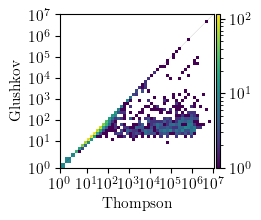

outputs/step/step_full_spencer_cn
492
0


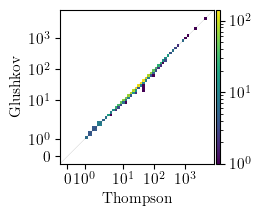

outputs/step/step_full_spencer_in
0
0


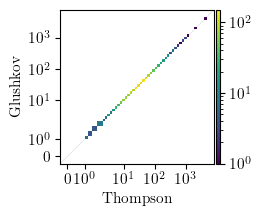

outputs/step/step_full_lockstep_none
0
0


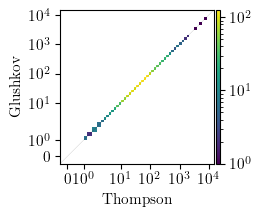

outputs/step/step_partial_spencer_none
1170
0


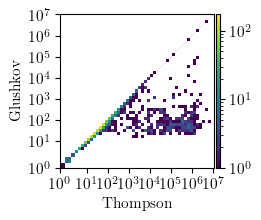

outputs/step/step_partial_spencer_cn
453
0


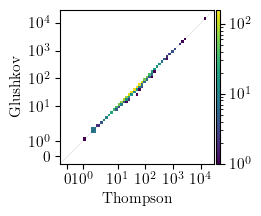

outputs/step/step_partial_spencer_in
0
0


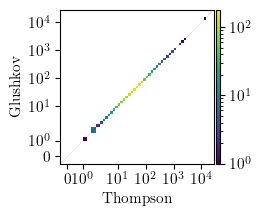

outputs/step/step_partial_lockstep_none
0
0


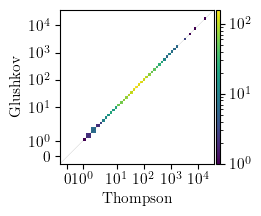

outputs/state/state_full_spencer_none
439632
0


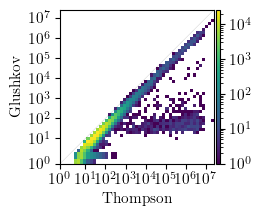

outputs/state/state_full_spencer_cn
439632
0


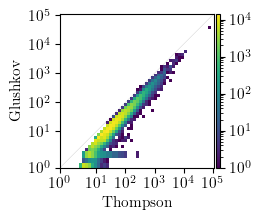

outputs/state/state_full_spencer_in
439632
0


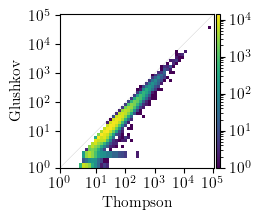

outputs/state/state_full_lockstep_none
439632
0


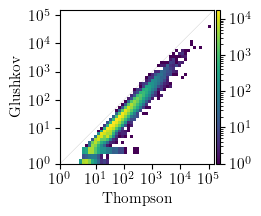

outputs/state/state_partial_spencer_none
330858
0


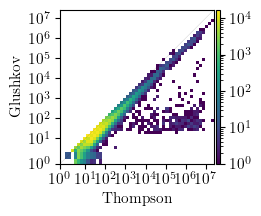

outputs/state/state_partial_spencer_cn
330858
0


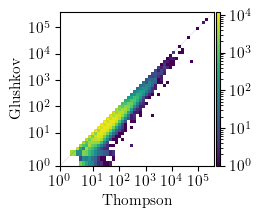

outputs/state/state_partial_spencer_in
330858
0


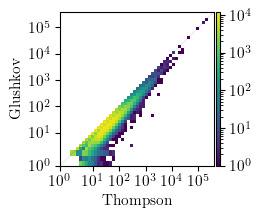

outputs/state/state_partial_lockstep_none
330857
1


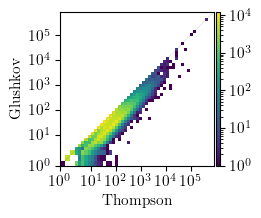

In [190]:
prefixes = ['step', 'state']
xlabel = "Thompson"
ylabel = "Glushkov"
for prefix in prefixes:
    output_dir = Path(f'./outputs/{prefix}/')
    data = prefix_to_data[prefix]
    for option in product(matching_types, scheduler_memo_schemes):
        matching_type, (scheduler, memo_scheme) = option

        mask = result_mask & star_mask
        if prefix == 'step':
            mask &= eliminated_mask
        xs = data[matching_type]['thompson'][scheduler][memo_scheme][mask]
        ys = data[matching_type]['flat'][scheduler][memo_scheme][mask]

        space = np.geomspace(1, max(xs+ys), 50)
        bins = (space, space)

        filename = "_".join(
            [prefix, matching_type, scheduler, memo_scheme])
        filepath = output_dir / filename

        fig, axes = plt.subplots(1, 1, figsize=(2, 2))
        axes.axline((0, 0), slope=1, alpha=0.3, color='black', linewidth=0.2)

        h, _, _, cmap = axes.hist2d(xs, ys, bins=bins, norm='log')
        axes.set_xscale('symlog')
        axes.set_yscale('symlog')
        axes.set_xlabel(xlabel)
        axes.set_ylabel(ylabel)
        axes.axis('square')

        pos = axes.get_position()
        cbar_ax = fig.add_axes([pos.x1 + 0.01, pos.y0, 0.02, pos.y1 - pos.y0])
        fig.colorbar(cmap, cax=cbar_ax)
        
        print(filepath)
        print(np.sum(xs > ys))
        print(np.sum(xs < ys))
        
        if dry_run:
            plt.show()
        else:
            filepath.parent.mkdir(parents=True, exist_ok=True)
            plt.savefig(filepath.with_suffix('.pdf'), bbox_inches='tight')
            plt.savefig(filepath.with_suffix('.pgf'), bbox_inches='tight')

In [182]:
prefixes = ['step', 'state']
xlabel = "Thompson"
ylabel = "Glushkov"
for prefix in prefixes:
    data = prefix_to_data[prefix]
    for matching_type, construction in product(['all'], constructions):
        matching_type, (scheduler, memo_scheme) = option

        mask = result_mask & star_mask
        xs = data[matching_type][construction]['lockstep']['none'][mask]
        ys = data[matching_type][construction]['spencer']['in'][mask]

        filename = "_".join([prefix, matching_type, construction])
        print(filename)
        print(f"{np.mean((ys+1) / (xs+1)) * 100}%")

step_full_thompson
92.4798118456633%
step_full_flat
92.4798118456633%
state_full_thompson
71.12658684470729%
state_full_flat
92.23840278527564%


223915
0

outputs/step-another/step_full_thompson


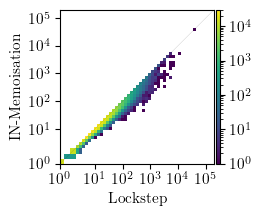

223916
0

outputs/step-another/step_full_flat


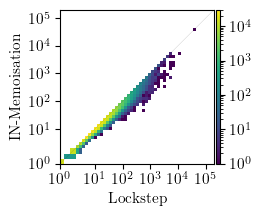

439319
1
^I should be alerted that my credentials are invalid$
outputs/state-another/state_full_thompson


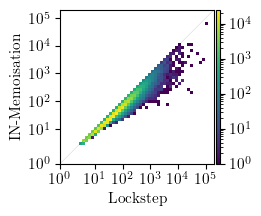

224690
172
^.{2,10}:.*,.*-.*°.*;.*$
outputs/state-another/state_full_flat


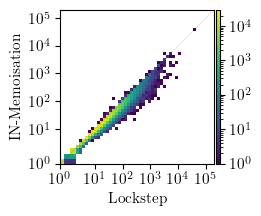

In [204]:
prefixes = ['step', 'state']
xlabel = "Lockstep"
ylabel = "IN-Memoisation"
for prefix in prefixes:
    output_dir = Path(f'./outputs/{prefix}-another/')
    data = prefix_to_data[prefix]
    for matching_type, construction in product(['full'], constructions):
        mask = result_mask
        xs = data[matching_type][construction]['lockstep']['none'][mask]
        ys = data[matching_type][construction]['spencer']['in'][mask]

        space = np.geomspace(1, 10 ** (5.3), 50)
        bins = (space, space)

        filename = "_".join([prefix, matching_type, construction])
        filepath = output_dir / filename

        fig, axes = plt.subplots(1, 1, figsize=(2, 2))
        axes.axline((0, 0), slope=1, alpha=0.3, color='black', linewidth=0.2)

        h, _, _, cmap = axes.hist2d(xs, ys, bins=bins, norm='log')
        axes.set_xscale('symlog')
        axes.set_yscale('symlog')
        axes.set_xlabel(xlabel)
        axes.set_ylabel(ylabel)
        axes.axis('square')

        pos = axes.get_position()
        cbar_ax = fig.add_axes([pos.x1 + 0.01, pos.y0, 0.02, pos.y1 - pos.y0])
        fig.colorbar(cmap, cax=cbar_ax)
        
        print(np.sum(xs > ys))
        print(np.sum(xs < ys))
        print(filepath)
        
        if dry_run:
            plt.show()
        else:
            filepath.parent.mkdir(parents=True, exist_ok=True)
            plt.savefig(filepath.with_suffix('.pdf'), bbox_inches='tight')
            plt.savefig(filepath.with_suffix('.pgf'), bbox_inches='tight')

In [ ]:
xs = steps_dict['full']['flat']['spencer']['in']
ys = states_dict['full']['flat']['spencer']['in']
dataset = datasets['full']['flat']['spencer']['in']
for index in np.flatnonzero(xs < ys):
    input()
    data = dataset[index]
    print(data["pattern"])
    positive_inputs = data["positive_inputs"]
    negative_inputs = data["negative_inputs"]
    inputs = positive_inputs + negative_inputs

    positive_results = data["positive_benchmark_results"]
    negative_results = data["negative_benchmark_results"]
    results = positive_results + negative_results
    
    for string, result in zip(inputs, results):
        if result is None:
            continue
        if result['step'] != result['state']:
            print(string)
            print(result)
            break

^\s*(\w+)\s*=\s*['"]?([^'"]+)['"]?\s*$
 '9z3Bx"		
{'step': 54, 'memo_entry': 44, 'state': 66, 'eliminated': 8, 'memoised': 0, 'thread': 31}


desc\[\"english\"\]\s*\=\s*string\s*\(\s*\"\s*([^\)]*)\"\s*\)\s*\;
desc["english"]	

  	
=string     (
; "
{'step': 103, 'memo_entry': 83, 'state': 107, 'eliminated': 15, 'memoised': 0, 'thread': 35}


(konqueror)\/((\d+)?[\w\.]+)
konqueror/1710814399
{'step': 23, 'memo_entry': 13, 'state': 24, 'eliminated': 2, 'memoised': 0, 'thread': 12}


^(([^<>()[]\.,;:s@"]+(.[^<>()[]\.,;:s@"]+)*)|(".+"))@(([[0-9]{1,3}.[0-9]{1,3}.[0-9]{1,3}.[0-9]{1,3}])|(([a-zA-Z-0-9]+.)+[a-zA-Z]{2,}))$
"iH$Vy)*N"@Rw6PLswzNL^hHCWVIy8cwVwMAug
{'step': 113, 'memo_entry': 69, 'state': 116, 'eliminated': 11, 'memoised': 0, 'thread': 39}


^(?:\s+\n+)








{'step': 10, 'memo_entry': 10, 'state': 11, 'eliminated': 2, 'memoised': 0, 'thread': 8}


(\d+[.,]?\d*)(\+(\d+[.,]?\d*)){1}i
95748,6021+30qi
{'step': 40, 'memo_entry': 33, 'state': 50, 'eliminated': 6, 'memoised': 0, 'thread': 25}
